# How Effective Is Social Distancing?

*A visual analysis of the impacts of Social Distancing on COVID19 virulence using the `see19` python package and dataset [available here](https://github.com/ryanskene/see19).*

In [1]:
from datetime import datetime as dt
print ('Last Updated: ', dt.now().strftime('%b %d, %Y'))

Last Updated:  May 11, 2020


***Analysis compatible with version 0.2.0 of see19***

Social Distancing has been trumpeted by experts the world over as the surefire approach to containing the virus and sparing us from health and economic devastation.

I personally have been quarantined for almost 8 weeks now and have happily practiced social distancing. I am not arguing against its use.

So far, however, the effectiveness of social distancing in reducing either the total number of deaths or the maximum fatality rate is not immediately evident in the `see19` data.

Below I argue that the apparent effectiveness of social distancing may actually be a reflection of the climate (estimated via temperature) of a region.

**How to Measure Social Distancing**

To study the impact of social distancing, the Blavatnik School of Government at Oxford University is maintaining a [Government Response Tracker](https://github.com/OxCGRT/covid-policy-tracker), providing daily updates on government social distancing implementation across various categories, and providing a helpful aggregate indicator called the **Stringency Index**.

To start, instantiate a casestudy focused on the `strindex` and the Google mobility measures. 

In [2]:
from bokeh.io import output_notebook, show
output_notebook()
%matplotlib inline 

Loading BokehJS ...

In [6]:
from see19 import CaseStudy, get_baseframe
from casestudy.see19 import CaseStudy, get_baseframe
baseframe = get_baseframe(test=True)

***NOTE*** The Stringency Index is provided only at the country level, so aggregate the see19 dataset to the country level for most meaningful results. This can be done by setting the `country_level` parameter to `True`

In [7]:
excluded_countries = ['China']

regions = list(baseframe[(~baseframe['country'].isin(excluded_countries))] \
    .sort_values('population', ascending=False) \
    .region_name.unique())[:200]

factors = ['strindex']
factor_dmas = {factor: 28 for factor in factors}

casestudy = CaseStudy(
    baseframe, regions=regions, excluded_countries='China', count_dma=14, 
    factors=factors, factor_dmas=factor_dmas, 
    start_hurdle=.1, start_factor='deaths_per_1M', 
    lognat=True, country_level=True
)

## LATE STRINGENCY

### 28DMA Strindex on Day of Max Fatalities

The first graph will simply look at a region's maximum fatality rate vs its 28-day moving average stringency index on the date of its max rate, dubbed *Late Stringency*

In [ ]:
title = 'Max Daily Fatalities v Late Stringency'
subtitle = '*Stringency Index measured from day of peak fatalities'
note = '**{} Countries excluding mainland China'.format(casestudy.df.region_id.unique().shape[0])
kwargs = {
    'comp_category': 'deaths_new_dma_per_person_per_city_KM2_lognat', 'comp_factor': 'strindex_dma', 
    'comp_factor_start': 'max',
    'fs_xticks': 8, 'fs_yticks': 8, 'fs_xlabel': 10, 'fs_ylabel': 8,
    'pad_xlabel': 4, 'pad_ylabel': 1,
    'width': 4, 'height': 3, 'hexsize': 29,
}

kwargs['annotations'] = [
    [-2.8, 2.35, '>7 deaths per 1M', {'color': 'black', 'fontsize': 6, 'ha': 'left', 'va': 'center', 'alpha': .4,}],
    [-2.8, 0.35, '>1 death per 1M', {'color': 'black', 'fontsize': 6, 'ha': 'left', 'va': 'center', 'alpha': .4,}],
    [-3.4, 6.8, title, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center',}],
    [-3.1, 5.6, subtitle, {'color': 'black', 'fontsize': 8, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
    [-3.1, 4.6, note, {'color': 'black', 'fontsize': 8, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
]
kwargs['hlines'] = [2, 0]
kwargs['save_file'] = True
kwargs['filename'] = '/Users/spindicate/Documents/docs/covid19/charts/Fatalities & Late Stringency.png'
plt = casestudy.heatmap.make(**kwargs)

There are a few takeaways:    
* There isn't a clear correlation between stringency in the two weeks prior to peak and peak fatalities. 
* It does appear that the ***most*** stringent regions were perhaps less impacted than other regions.
* Each level of stringency has regions with high fatalities and low fatalities.
* Some of the outliers with the lowest stringency have very low death rates.

AND ...

In [7]:
test = ((casestudy.heatmap.df_hm.strindex_dma < 80) & (casestudy.heatmap.df_hm[kwargs['comp_category']] > 0))
casestudy.heatmap.df_hm[test]

,region_id,region_name,deaths_new_dma_per_person_per_city_KM2_lognat,strindex_dma
135,reg_for_CAN,Canada,1.403221,76.730
138,reg_for_USA,United States of America (the),1.705177,69.995


* There are only ***two*** regions with __<80 strindex__ and max rate **>1 death per unit density**

## Early Stringency 

### 28DMA Strindex on Day of 1 Fatality Per 100,000 Population

The chart above perhaps only shows that Social Distancing has minimal impact once the infection rate is already well out-of-control. 

So now we consider the `strindex` 28DMA at the early stages of the outbreak, when each country reached 1 death per 100K population, dubbed *Early Stringency*

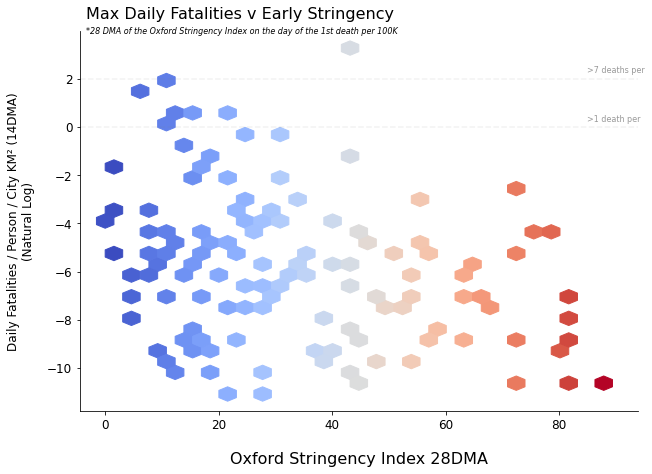

In [8]:
kwargs['comp_factor_start'] = 'start_hurdle'

kwargs['comp_category'] = 'deaths_new_dma_per_person_per_city_KM2_lognat'

title = 'Max Daily Fatalities v Early Stringency'
subtitle = '*28 DMA of the Oxford Stringency Index on the day of the 1st death per 100K'
note = '**{} Countries considered excluding mainland China'.format(casestudy.df.region_id.unique().shape[0])

kwargs['annotations'] = [
    [85, 2.35, '>7 deaths per', {'color': 'black', 'fontsize': 8, 'ha': 'left', 'va': 'center', 'alpha': .4,}],
    [85, 0.35, '>1 death per', {'color': 'black', 'fontsize': 8, 'ha': 'left', 'va': 'center', 'alpha': .4,}],
    [-3.4, 4.68, title, {'color': 'black', 'fontsize': 16, 'ha': 'left', 'va': 'center',}],
    [-3.4, 4., subtitle, {'color': 'black', 'fontsize': 8, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
]
plt = casestudy.heatmap.make(**kwargs)

So if we look *earlier* in the future, we can see a bit more of an effect. 

Regions with more stringent actions did seem to have lower death rates more often.

For example, we can see that ***no*** country with a **strindex >40** experienced  **>1 death per unit density.**

## Why?

So what to make of this? Obviously stricter social distancing earlier in the outbreak made for a better outcome. 

But how did a country know to enact social distancing early or not? Was it some kind of prescience? Quick decisions by government? Or something else?

### Strindex over time
Look at how `strindex` for each region changes over time. 
* Did the least impacted regions with the higher `strindex` implement policies much sooner? 
* Did they hold them in place for longer?

We'll first look at the top 10 highest `strindex` in `df_hm` on the original timeline (beginning with `start_hurdle`)

In [9]:
from bokeh.palettes import Category20b

strin_regions = casestudy.heatmap.df_hm.sort_values(by='strindex_dma', ascending=False).region_name
regions = list(strin_regions[:10])
kwargs = {
    'width': 825, 'height': 500,
    'palette_base': Category20b[20],
    'label_offsets': {
        'Taiwan': {'x_offset': 10, 'y_offset': 5},
    },
    'title': 'Oxford Stringency Index Comparison; Highest Early Strindex'
}
p = casestudy.comp_chart.make(regions=regions, comp_category='strindex', comp_type='multiline', **kwargs)
show(p)

The chart above looks useless but it does tell us that the days between the `start_hurdle` and the peak fatality rate were quite small for most of them. ***We will return to this later***

The chart above also stands in **stark contrast** to the chart below, which is for the countries with the top 10 `strindex_dma` in the heatmap.

In [10]:
strin_regions = casestudy.heatmap.df_hm.sort_values(by='strindex_dma', ascending=True).region_name
regions = list(strin_regions[:10])
kwargs = {
    'width': 825, 'height': 500,
    'palette_base': Category20b[20],
    'label_offsets': {
        'Taiwan': {'x_offset': 10, 'y_offset': 5},
    },
   'title': 'Oxford Stringency Index Comparison; Lowest Early Strindex'
}
p = casestudy.comp_chart.make(regions=regions, comp_category='strindex', comp_type='multiline', **kwargs)
show(p)

So countries with a lower strindex at the outset of the outbreak generally appear to have had much longer outbreaks, in addition to much steeper ones.

## When Did Countries Begin Social Distancing?

So there are regions that had high `strindex` going into the `start_hurdle`. They must have been a pro-active bunch. They must have moved well in-advance of the other groups and, thereby, saw a lesser impact.

***Not So Fast***

To check this, first instantiate another `casestudy` object, this time eliminating the `start_hurdle`, allowing us to look all the way back to 01Jan2020.

This time we'll look at the 10 highest and 10 lowest **early strindex** countries together.

In [13]:
regions = list(baseframe[(~baseframe['country'].isin(excluded_countries))] \
    .sort_values('population', ascending=False) \
    .region_name.unique())[:200]

casestudy_nohurdle = CaseStudy(
    baseframe, regions=regions, count_dma=14, factors=factors, 
    factor_dmas=factor_dmas, start_hurdle=0, start_factor='', lognat=True, country_level=True,
)
kwargs = {
    'width': 825, 'height': 500,
    'palette_base': Category20b[20],
    'multiline_labels': False,
}
strin_regions = casestudy.heatmap.df_hm.sort_values(by='strindex_dma', ascending=True).region_name
regions = list(strin_regions[:10]) + list(strin_regions[-10:])
p = casestudy_nohurdle.comp_chart.make(regions=regions, comp_category='strindex', comp_type='multiline', **kwargs)
show(p)

Low and high **early strindex** countries appear to have implemented social distancing at essentially the **same time**.

Except for Cape Verde. Nice Job, Cape Verde.

### What the Hex Is Going On?
The above chart makes a good point, but there's a better, more beautiful way to get it across.

Go outside of the `see19` package to use standard `matplotlib` and its `hexbin` chart. The `hexbin` is effecitvely a 2D histogram. The chart array is arranged into equal hexagonal areas, or "bins". The color of each bin is mapped to the number of datapoints that fall within the bin.

With our scale, the more datapoints in the bin, the brighter the bin will be.

If the more stringent regions are being proactive, we might expect to see the hex colors spread out more evenly, perhaps with a large group moving earlier.

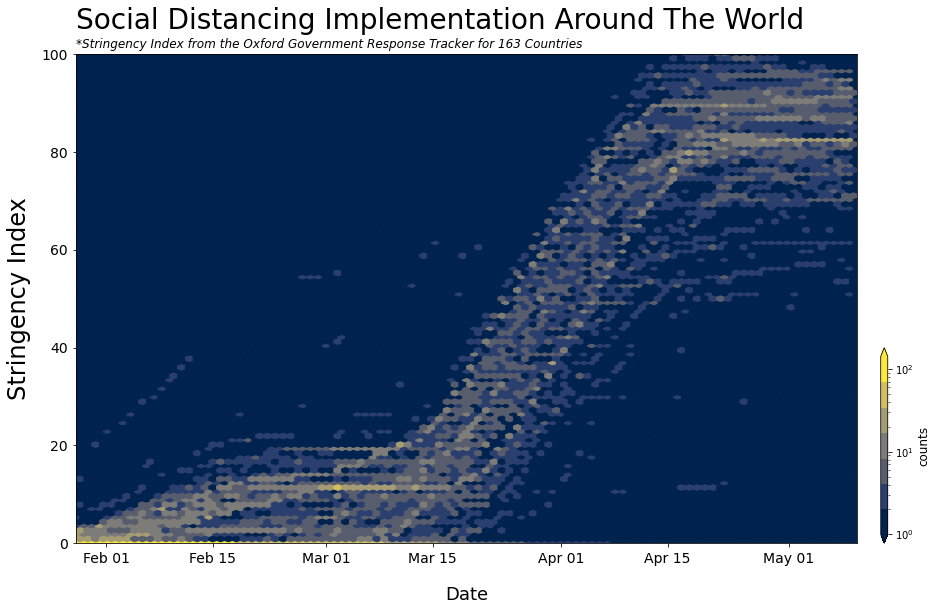

In [16]:
import pylab as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# There is no strindex prio to 27Jan2020
df_hex = casestudy_nohurdle.df[casestudy_nohurdle.df.date > '2020-1-27']

fig, ax = plt.subplots(figsize=(14, 9))
x = df_hex.date
x = pl.date2num(x)
y = df_hex.strindex_dma
hb = ax.hexbin(x, y, gridsize=100, cmap=plt.cm.get_cmap('cividis', 7), bins='log')
ax.axis([x.min(), x.max(), y.min(), y.max()])

ax.xaxis_date()
ax.xaxis.major.formatter.scaled[1.0] = "%b %d"
ax.set_xlabel('Date', fontsize=18, labelpad=20)
ax.tick_params(axis='x', labelsize=14, which='major', pad=5)

ax.set_ylabel('Stringency Index', fontsize=24, labelpad=10)
ax.tick_params(axis='y', labelsize=14, which='major', pad=5)

ax.set_title('Social Distancing Implementation Around The World', fontsize=28, loc='left', pad=25)
subtitle = '*Stringency Index from the Oxford Government Response Tracker for {} Countries'.format(casestudy_nohurdle.df.region_name.unique().shape[0])
ax.text(0, 1.02, subtitle, 
        {
            'transform': ax.transAxes, 'color': 'black', 'fontsize': 12, 
            'ha': 'left', 'va': 'center', 'alpha': 1,
            'style': 'italic'
        }
    )

cax = inset_axes(ax,
    width='3%',
    height='40%',
    loc='lower left',
    bbox_to_anchor=(1.03, 0., .3, 1),
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cb = fig.colorbar(hb, extend='both', cax=cax, orientation='vertical')
cb.set_label('', labelpad=4, fontsize=12)

cb.set_label('counts')

In fact, what we see is that the vast majority of regions in the set increased stringency at ***essentially*** the **same time**, beginning at around 15Mar2020.

So the regions with lower strindex at the time of max fatality likely did **not** have a first mover advantage.

## So ... What Else Could It Be???

To answer this I went back to the original `see19` dataset at the regional level and compared various factors to `strindex`. I looked at many factors, but in this analysis, I will highlight one.

**NOTE** The Oxford Stringency Index is computed at the country level and may not map well onto state / provincial differences. It should be used simply as a broad indicator when compared to regional level data like `temp` and `uvb`.

In [17]:
excluded_countries = ['China']

regions = list(baseframe[(~baseframe['country'].isin(excluded_countries))] \
    .sort_values('population', ascending=False) \
    .region_name.unique())[:200]

factors = ['uvb', 'temp', 'strindex']
factor_dmas = {factor: 28 for factor in factors}

casestudy = CaseStudy(
    baseframe, regions=regions, count_dma=14, factors=factors, 
    factor_dmas=factor_dmas, start_hurdle=.1, start_factor='deaths_per_1M', lognat=True,
)

Here we will rearrange the chart, putting `temp_dma` on the x-axis and now use the `strindex` to map our color scheme.

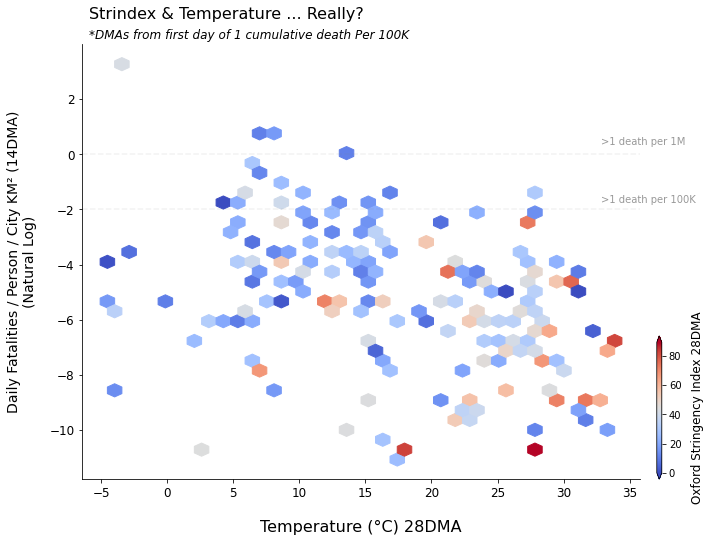

In [21]:
kwargs = {
    'comp_category': 'deaths_new_dma_per_person_per_city_KM2_lognat', 
    'comp_factor': 'temp_dma', 'comp_factor_start': 'start_hurdle',
    'color_factor': 'strindex_dma', 'color_factor_start': 'start_hurdle',
    'fs_xticks': 12, 'fs_yticks': 12, 'fs_xlabel': 16, 'fs_ylabel': 14,
    'fs_clabel': 12,
    'width': 10, 'height': 8, 'hexsize': 35,
}
kwargs['hlines'] = [0, -2]

title = 'Strindex & Temperature ... Really?'
subtitle = '*DMAs from first day of 1 cumulative death Per 100K'
subtitle2 = '**Color-mapped to change in transit mobility'

kwargs['annotations'] = [
    [-1000, 227, '>1 death per 1M', {'color': 'black', 'fontsize': 10, 'ha': 'left', 'va': 'center', 'alpha': .4,}],
    [-1000, 187, '>1 death per 100K', {'color': 'black', 'fontsize': 10, 'ha': 'left', 'va': 'center', 'alpha': .4,}],
    [-10100, 314, title, {'color': 'black', 'fontsize': 16, 'ha': 'left', 'va': 'center',}],
    [-10100, 300, subtitle, {'color': 'black', 'fontsize': 12, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
]
plt = casestudy.heatmap.make(**kwargs)

The highlighted region above appears to show higher **early strindex** for regions with temperatures greater than 20C.

Those regions on average also had lower fatality rates.

### How Can This Be?

Are countries with higher temperatures somehow blessed with greater technological ability or innate social awareness to combat the impact of the virus?

Did warmer and sunnier regions for some reason enact stricter social distancing policies?



It is difficult to know the exact nature of the relationship between these two seemingly unrelated variables.

I have developed one theory, however, and it can be seen in the below chart.

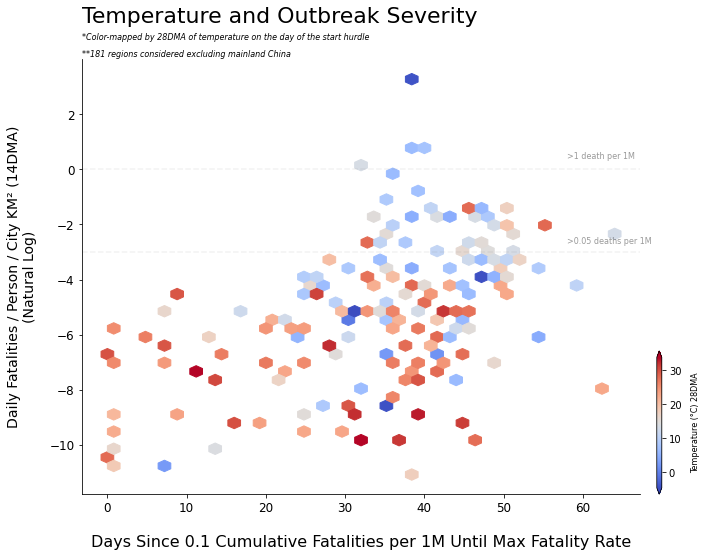

In [22]:
kwargs = {
    'comp_category': 'deaths_new_dma_per_person_per_city_KM2_lognat', 'comp_factor': 'days_to_max', 
    'comp_factor_start': 'start_hurdle',
    'fs_xticks': 12, 'fs_yticks': 12, 'fs_xlabel': 16, 'fs_ylabel': 14, 'fs_clabel': 8,
    'width': 10, 'height': 8, 'hexsize': 20,
}

kwargs['color_factor_start'] = 'start_hurdle'
kwargs['color_factor'] = 'temp_dma'
kwargs['hexsize'] = 40

title = 'Temperature and Outbreak Severity'
subtitle = '*Color-mapped by 28DMA of temperature on the day of the start hurdle'
note = '**{} regions considered excluding mainland China'.format(casestudy.df.region_id.unique().shape[0])

kwargs['hlines'] = [-3,0]
kwargs['annotations'] = [
    [-690, 93, '>1 death per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'left', 'va': 'center', 'alpha': .4,}],
    [-690, 68, '>0.05 deaths per 1M', {'color': 'black', 'fontsize': 8, 'ha': 'left', 'va': 'center', 'alpha': .4,}],
    [-4400, 134, title, {'color': 'black', 'fontsize': 22, 'ha': 'left', 'va': 'center',}],
    [-4400, 128, subtitle, {'color': 'black', 'fontsize': 8, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
    [-4400, 123, note, {'color': 'black', 'fontsize': 8, 'ha': 'left', 'va': 'center', 'style': 'italic'}],
]
plt = casestudy.heatmap.make(**kwargs)

The above chart shows the relationship between the maximum daily fatality rate and the number of days since the `start_hurdle` is met.

With all the talk of flattening the curve, it is a bit surprising to see a pretty clear correlation. The longer the time from trough-to-peak, the higher the peak. In reality this is perfectly understandable. More potent outbreaks will last longer and have more impact.

What you must notice, though, is that regions with shorter days to peak (and a lower peak) ***also*** tended to be warmer than regions with longer days to peak.

As it pertains to Social Distancing then, it appears that the apparent efficacy of Stringency may simply be an accident of the climate.